In [48]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
#import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')


In [90]:
train=pd.read_csv('allData.csv')
print(train.head())
print(train['Location'].unique())

           Date Built         Date Priced  Distance from Capital  \
0   6/5/1611 11:44 PM   6/5/1611 11:44 PM              19.885265   
1   3/10/1610 2:23 PM   3/10/1610 2:23 PM              25.106037   
2   7/26/1608 5:17 AM   7/26/1608 5:17 AM              87.174747   
3  10/10/1612 2:47 PM  10/10/1612 2:47 PM             111.965941   
4   1/19/1612 7:39 AM   1/19/1612 7:39 AM              27.953048   

   Distance from Guarding Tower  Distance from Knight's house  \
0                     22.395136                     29.921162   
1                     24.824660                     36.084848   
2                     59.149911                     98.032248   
3                     72.036244                    122.889439   
4                      7.977065                     38.774105   

   Distance from Royal Market  Distance from the Dock  \
0                   92.698917               79.724550   
1                  141.942752              145.034612   
2                   16.476015

In [91]:
train.head()

,Date Built,Date Priced,Distance from Capital,Distance from Guarding Tower,Distance from Knight's house,Distance from Royal Market,Distance from the Dock,Distance from the River,Holy tree,House ID,King visited,Location,bathrooms,bedrooms,blessings,cursed,dining rooms,farm,garden,renovation
0,6/5/1611 11:44 PM,6/5/1611 11:44 PM,19.885265,22.395136,29.921162,92.698917,79.724550,8.059939,NaN,6e32cece,0.0,The Mountains,2.0,2.0,140.0,0.0,2.0,small,no space,0.0
1,3/10/1610 2:23 PM,3/10/1610 2:23 PM,25.106037,24.824660,36.084848,141.942752,145.034612,21.448160,stands beside,6e32cf20,0.0,The Mountains,4.0,3.0,135.0,0.0,4.0,small,no space,0.0
2,7/26/1608 5:17 AM,7/26/1608 5:17 AM,87.174747,59.149911,98.032248,16.476015,54.645921,2.980832,cut by Ancient witch,6e32cf76,0.0,Cursed Land,3.0,2.0,73.0,1.0,2.0,small,no space,0.0
3,10/10/1612 2:47 PM,10/10/1612 2:47 PM,111.965941,72.036244,122.889439,99.671185,151.105728,9.879558,stands beside,6e32cf7c,0.0,Servant's Premises,2.0,2.0,48.0,0.0,3.0,small,no space,0.0
4,1/19/1612 7:39 AM,1/19/1612 7:39 AM,27.953048,7.977065,38.774105,50.869864,11.666815,13.758185,NaN,6e32cf80,0.0,The Mountains,3.0,4.0,132.0,0.0,3.0,small,no space,0.0


In [92]:
print(train.garden.unique())
print("***********************************************************************")
print(train.renovation.unique())
print("***********************************************************************")
print(train.farm.unique())
print("***********************************************************************")
print(train.cursed.unique())
print("***********************************************************************")
print(train.Location.unique())
print("***********************************************************************")
print(train['Holy tree'].unique())
#location aprint("***********************************************************************")

['no space' nan 'beautiful']
***********************************************************************
[  0.  nan   1.]
***********************************************************************
['small' 'huge' 'no land']
***********************************************************************
[  0.   1.  nan]
***********************************************************************
['The Mountains' 'Cursed Land' "Servant's Premises" nan "King's Landing"]
***********************************************************************
[nan 'stands beside' 'cut by Ancient witch']


In [93]:
#mapping the values of the sub-features in each feature of the dataset into binary values
#location  is to be dropped after one-hot encoding using scheme

dummies= pd.get_dummies(train['Location'])
train.drop('Location',axis=1,inplace=True)
train=train.join(dummies)

In [94]:
#dropping farm and any one of the dummy rows similarly
dummy_farm=pd.get_dummies(train['farm'])
train.drop(['farm'],axis=1,inplace=True)
train=train.join(dummy_farm)
train.drop(['huge'],axis=1,inplace=True)

# as both date priced and date built are same we remove the date priced column to prevent overfit
train.drop(['Date Priced'],axis=1,inplace=True)

In [95]:
#proceeding similarly for HOLY_tree
dummy_HolyTree=pd.get_dummies(train['Holy tree'])
train.drop(['Holy tree'],axis=1,inplace=True)
train=train.join(dummy_HolyTree)

In [96]:
train.garden=train.garden.map({'no space' :0,'beautiful' : 1})


house_prices=pd.read_csv('house_prices.csv')

print(house_prices)
print(house_prices.unique())

       House ID  Golden Grains
0      6e32cec0      1470912.0
1      6e32cec4      1241030.0
2      6e32cec9       838723.0
3      6e32cece      1267804.0
4      6e32ced1      1497166.0
5      6e32ced3      1428460.0
6      6e32ced5      1453568.0
7      6e32ced7      1381186.0
8      6e32ceda      1052137.0
9      6e32cedd      1473032.0
10     6e32cedf      1442065.0
11     6e32cee4      1583875.0
12     6e32cee9      1430528.0
13     6e32ceeb       957702.0
14     6e32ceed      1330487.0
15     6e32cef3      1309373.0
16     6e32cef9      1109247.0
17     6e32cefc      1185887.0
18     6e32cefe      1219965.0
19     6e32cf01      1322296.0
20     6e32cf07      1468637.0
21     6e32cf09      1017577.0
22     6e32cf0e      1150209.0
23     6e32cf10      1351400.0
24     6e32cf13      1226995.0
25     6e32cf17      1328810.0
26     6e32cf1a      1273623.0
27     6e32cf20      1263657.0
28     6e32cf26      1386556.0
29     6e32cf2a      1620012.0
...         ...            ...
19970   

AttributeError: 'DataFrame' object has no attribute 'unique'

In [97]:
# MERGING THE DATASET ,DIVIDING INTO 2 PARTS
res_train=train['House ID']
res_train=pd.merge(train,house_prices,on='House ID')
print(res_train.info())
print("**********************************************************")
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16500 entries, 0 to 16499
Data columns (total 25 columns):
Date Built                      16500 non-null object
Distance from Capital           15669 non-null float64
Distance from Guarding Tower    15956 non-null float64
Distance from Knight's house    15669 non-null float64
Distance from Royal Market      14146 non-null float64
Distance from the Dock          14859 non-null float64
Distance from the River         16500 non-null float64
House ID                        16500 non-null object
King visited                    16500 non-null float64
bathrooms                       15536 non-null float64
bedrooms                        15851 non-null float64
blessings                       16500 non-null float64
cursed                          15502 non-null float64
dining rooms                    14862 non-null float64
garden                          14515 non-null float64
renovation                      14871 non-null float64
Cursed Land  

In [98]:
missing = pd.read_csv('missing.csv')
test = pd.merge(train,missing)
test.shape

(3500, 24)

In [99]:
print(res_train.garden.unique())
print("***********************************************************************")
print(res_train.renovation.unique())
print("***********************************************************************")
print(res_train.cursed.unique())
print("***********************************************************************")
print(res_train.info())


[  0.  nan   1.]
***********************************************************************
[  0.  nan   1.]
***********************************************************************
[  0.   1.  nan]
***********************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16500 entries, 0 to 16499
Data columns (total 25 columns):
Date Built                      16500 non-null object
Distance from Capital           15669 non-null float64
Distance from Guarding Tower    15956 non-null float64
Distance from Knight's house    15669 non-null float64
Distance from Royal Market      14146 non-null float64
Distance from the Dock          14859 non-null float64
Distance from the River         16500 non-null float64
House ID                        16500 non-null object
King visited                    16500 non-null float64
bathrooms                       15536 non-null float64
bedrooms                        15851 non-null float64
blessings            

In [100]:
#filling the NAN's with median


res_train['Distance from Capital']=res_train['Distance from Capital'].fillna(res_train['Distance from Capital'].median())
res_train['Distance from Guarding Tower']=res_train['Distance from Guarding Tower'].fillna(res_train['Distance from Guarding Tower'].median())
res_train['Distance from Knight\'s house']=res_train['Distance from Knight\'s house'].fillna(res_train['Distance from Knight\'s house'].median())
res_train['Distance from Royal Market']=res_train['Distance from Royal Market'].fillna(res_train['Distance from Royal Market'].median())
res_train['Distance from the Dock']=res_train['Distance from the Dock'].fillna(res_train['bathrooms'].median())

#for test
test['Distance from Capital']=test['Distance from Capital'].fillna(test['Distance from Capital'].median())
test['Distance from Guarding Tower']=test['Distance from Guarding Tower'].fillna(test['Distance from Guarding Tower'].median())
test['Distance from Knight\'s house']=test['Distance from Knight\'s house'].fillna(test['Distance from Knight\'s house'].median())
test['Distance from Royal Market']=test['Distance from Royal Market'].fillna(test['Distance from Royal Market'].median())
test['Distance from the Dock']=test['Distance from the Dock'].fillna(test['bathrooms'].median())




In [101]:
#for train
res_train['bathrooms']=res_train['bathrooms'].fillna(res_train['bathrooms'].median())
res_train['cursed']=res_train['cursed'].fillna(res_train['cursed'].median())
res_train['bedrooms']=res_train['bedrooms'].fillna(res_train['bedrooms'].median())

#for test
test['bathrooms']=test['bathrooms'].fillna(test['bathrooms'].median())
test['cursed']=test['cursed'].fillna(test['cursed'].median())
test['bedrooms']=test['bedrooms'].fillna(test['bedrooms'].median())

In [102]:
#for train
res_train['dining rooms']=res_train['dining rooms'].fillna(res_train['dining rooms'].median())
res_train['garden']=res_train['garden'].fillna(res_train['garden'].median())
res_train['renovation']=res_train['renovation'].fillna(res_train['renovation'].median())

#for test
test['dining rooms']=test['dining rooms'].fillna(test['dining rooms'].median())
test['garden']=test['garden'].fillna(test['garden'].median())
test['renovation']=test['renovation'].fillna(test['renovation'].median())


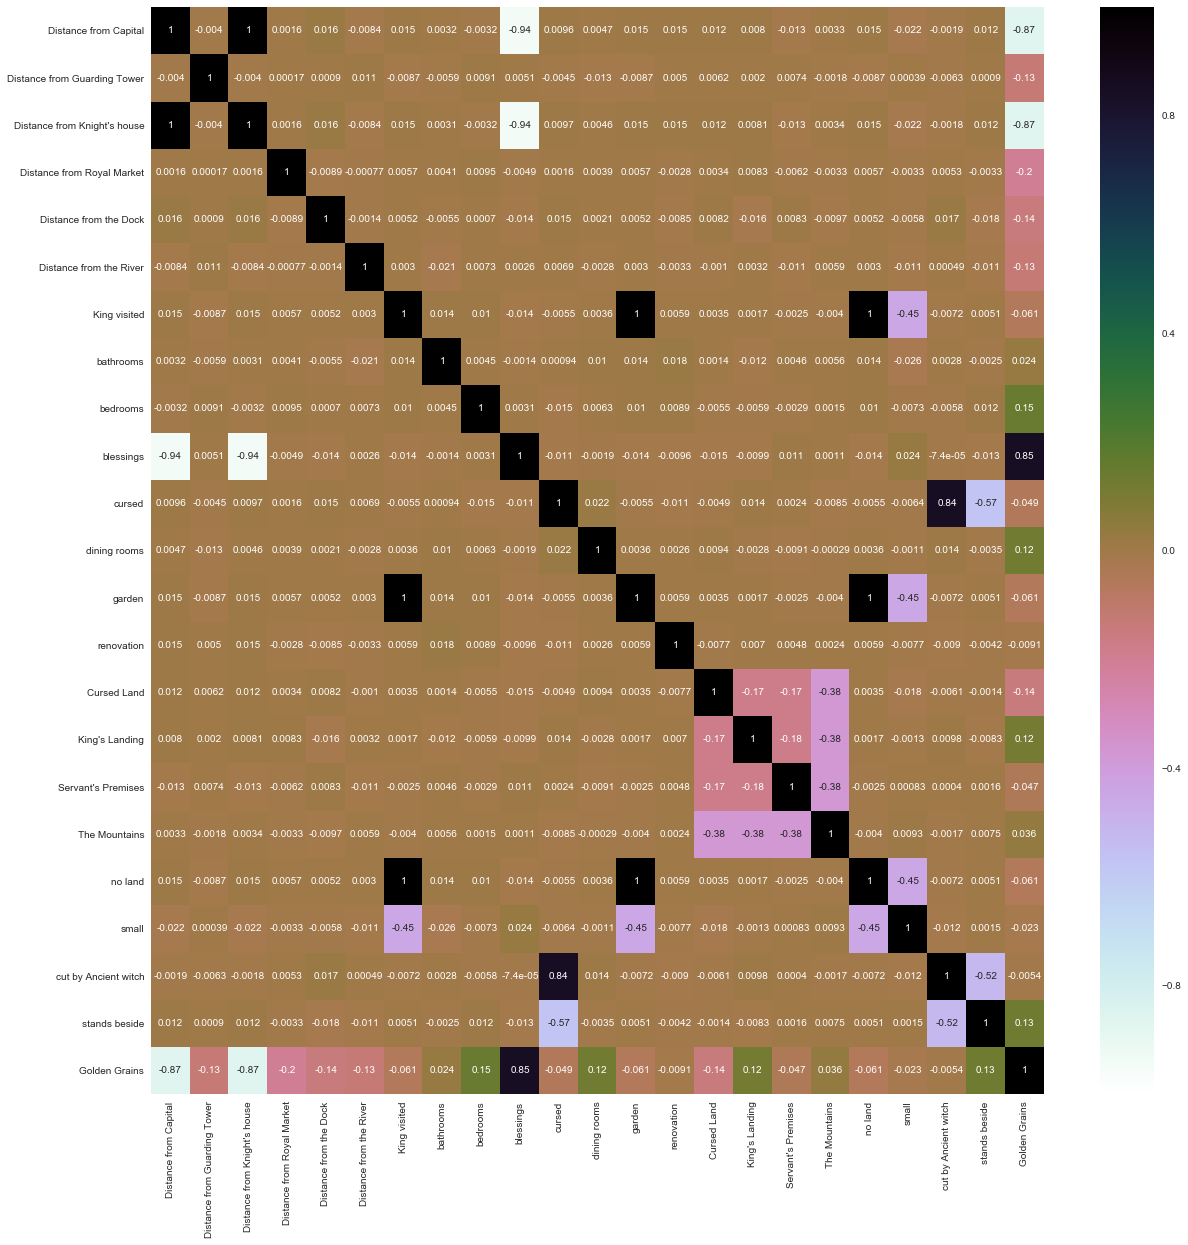

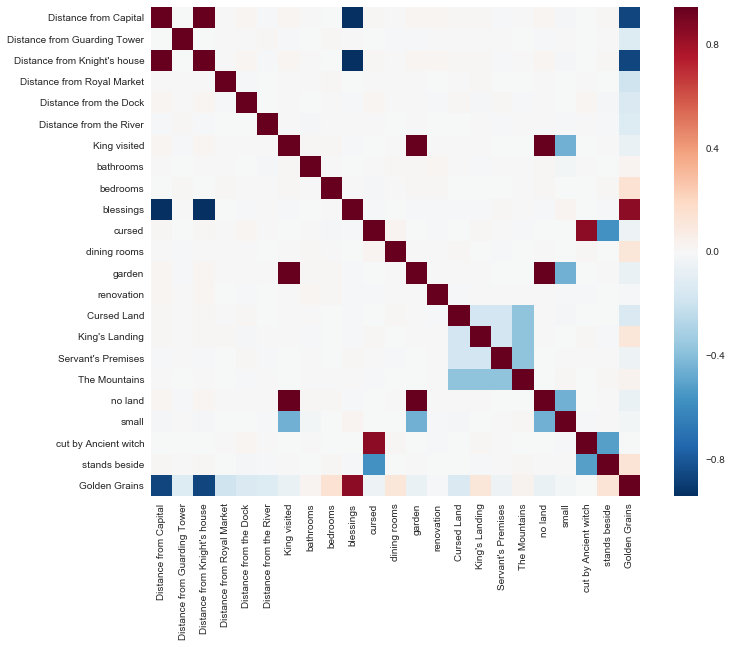

In [103]:
#heat  map

plt.figure(figsize=(20,20)) 
sns.heatmap(res_train.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

#correlation matrix
corrmat = res_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


In [104]:
print(res_train['Date Built'].min())
print("\n")
print(res_train['Date Built'].max())


#PANDAS mein  1677  tak minimum jaa skta hai but idhar ,aur bhi choti dates k saath deal karna hai toh,converting ..
#them directly to DATETIME using to_datetime would give errors

1/1/1607 11:39 AM


9/9/1612 9:37 AM


In [105]:
res_train.head()

,Date Built,Distance from Capital,Distance from Guarding Tower,Distance from Knight's house,Distance from Royal Market,Distance from the Dock,Distance from the River,House ID,King visited,bathrooms,...,renovation,Cursed Land,King's Landing,Servant's Premises,The Mountains,no land,small,cut by Ancient witch,stands beside,Golden Grains
0,6/5/1611 11:44 PM,19.885265,22.395136,29.921162,92.698917,79.724550,8.059939,6e32cece,0.0,2.0,...,0.0,0,0,0,1,0,1,0,0,1267804.0
1,3/10/1610 2:23 PM,25.106037,24.824660,36.084848,141.942752,145.034612,21.448160,6e32cf20,0.0,4.0,...,0.0,0,0,0,1,0,1,0,1,1263657.0
2,7/26/1608 5:17 AM,87.174747,59.149911,98.032248,16.476015,54.645921,2.980832,6e32cf76,0.0,3.0,...,0.0,1,0,0,0,0,1,1,0,1136222.0
3,10/10/1612 2:47 PM,111.965941,72.036244,122.889439,99.671185,151.105728,9.879558,6e32cf7c,0.0,2.0,...,0.0,0,0,1,0,0,1,0,1,837994.0
4,1/19/1612 7:39 AM,27.953048,7.977065,38.774105,50.869864,11.666815,13.758185,6e32cf80,0.0,3.0,...,0.0,0,0,0,1,0,1,0,0,1426681.0


In [106]:

train.head()

,Date Built,Distance from Capital,Distance from Guarding Tower,Distance from Knight's house,Distance from Royal Market,Distance from the Dock,Distance from the River,House ID,King visited,bathrooms,...,garden,renovation,Cursed Land,King's Landing,Servant's Premises,The Mountains,no land,small,cut by Ancient witch,stands beside
0,6/5/1611 11:44 PM,19.885265,22.395136,29.921162,92.698917,79.724550,8.059939,6e32cece,0.0,2.0,...,0.0,0.0,0,0,0,1,0,1,0,0
1,3/10/1610 2:23 PM,25.106037,24.824660,36.084848,141.942752,145.034612,21.448160,6e32cf20,0.0,4.0,...,0.0,0.0,0,0,0,1,0,1,0,1
2,7/26/1608 5:17 AM,87.174747,59.149911,98.032248,16.476015,54.645921,2.980832,6e32cf76,0.0,3.0,...,0.0,0.0,1,0,0,0,0,1,1,0
3,10/10/1612 2:47 PM,111.965941,72.036244,122.889439,99.671185,151.105728,9.879558,6e32cf7c,0.0,2.0,...,0.0,0.0,0,0,1,0,0,1,0,1
4,1/19/1612 7:39 AM,27.953048,7.977065,38.774105,50.869864,11.666815,13.758185,6e32cf80,0.0,3.0,...,0.0,0.0,0,0,0,1,0,1,0,0


In [107]:
# extracting each year from the dataset and subtracting from 1600 to give years 

def extract_year(time):
    date=time.split()[0]
    date , month, year = date.split('/')
    return year

res_train['Date Built'] = res_train['Date Built'].apply(extract_year).apply(int).apply(lambda x: (x-1600))
test['Date Built'] = test['Date Built'].apply(extract_year).apply(int).apply(lambda x: (x-1600))


or

#res_train['Date Built'] = res_train['Date Built'].apply(lambda x: extract_year(x))
#res_train['Date Built'] = res_train['Date Built'].apply(int)
#res_train['Date built'] = res_train['Date Built'].map(lambda x: x - 1600)

#test['Date Built'] = test['Date Built'].apply(lambda x: extract_year(x))
#test['Date Built'] = test['Date Built'].apply(int)
#test['Date built'] = test['Date Built'].map(lambda x: x - 1600)


In [111]:
res_train.head()

,Date Built,Distance from Capital,Distance from Guarding Tower,Distance from Knight's house,Distance from Royal Market,Distance from the Dock,Distance from the River,House ID,King visited,bathrooms,...,renovation,Cursed Land,King's Landing,Servant's Premises,The Mountains,no land,small,cut by Ancient witch,stands beside,Golden Grains
0,11,19.885265,22.395136,29.921162,92.698917,79.724550,8.059939,6e32cece,0.0,2.0,...,0.0,0,0,0,1,0,1,0,0,1267804.0
1,10,25.106037,24.824660,36.084848,141.942752,145.034612,21.448160,6e32cf20,0.0,4.0,...,0.0,0,0,0,1,0,1,0,1,1263657.0
2,8,87.174747,59.149911,98.032248,16.476015,54.645921,2.980832,6e32cf76,0.0,3.0,...,0.0,1,0,0,0,0,1,1,0,1136222.0
3,12,111.965941,72.036244,122.889439,99.671185,151.105728,9.879558,6e32cf7c,0.0,2.0,...,0.0,0,0,1,0,0,1,0,1,837994.0
4,12,27.953048,7.977065,38.774105,50.869864,11.666815,13.758185,6e32cf80,0.0,3.0,...,0.0,0,0,0,1,0,1,0,0,1426681.0


In [112]:
res_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16500 entries, 0 to 16499
Data columns (total 25 columns):
Date Built                      16500 non-null int64
Distance from Capital           16500 non-null float64
Distance from Guarding Tower    16500 non-null float64
Distance from Knight's house    16500 non-null float64
Distance from Royal Market      16500 non-null float64
Distance from the Dock          16500 non-null float64
Distance from the River         16500 non-null float64
House ID                        16500 non-null object
King visited                    16500 non-null float64
bathrooms                       16500 non-null float64
bedrooms                        16500 non-null float64
blessings                       16500 non-null float64
cursed                          16500 non-null float64
dining rooms                    16500 non-null float64
garden                          16500 non-null float64
renovation                      16500 non-null float64
Cursed Land   

In [114]:
train

,Date Built,Distance from Capital,Distance from Guarding Tower,Distance from Knight's house,Distance from Royal Market,Distance from the Dock,Distance from the River,House ID,King visited,bathrooms,...,garden,renovation,Cursed Land,King's Landing,Servant's Premises,The Mountains,no land,small,cut by Ancient witch,stands beside
0,6/5/1611 11:44 PM,19.885265,22.395136,29.921162,92.698917,79.724550,8.059939,6e32cece,0.0,2.0,...,0.0,0.0,0,0,0,1,0,1,0,0
1,3/10/1610 2:23 PM,25.106037,24.824660,36.084848,141.942752,145.034612,21.448160,6e32cf20,0.0,4.0,...,0.0,0.0,0,0,0,1,0,1,0,1
2,7/26/1608 5:17 AM,87.174747,59.149911,98.032248,16.476015,54.645921,2.980832,6e32cf76,0.0,3.0,...,0.0,0.0,1,0,0,0,0,1,1,0
3,10/10/1612 2:47 PM,111.965941,72.036244,122.889439,99.671185,151.105728,9.879558,6e32cf7c,0.0,2.0,...,0.0,0.0,0,0,1,0,0,1,0,1
4,1/19/1612 7:39 AM,27.953048,7.977065,38.774105,50.869864,11.666815,13.758185,6e32cf80,0.0,3.0,...,0.0,0.0,0,0,0,1,0,1,0,0
5,10/25/1612 11:27 AM,107.687755,122.390194,118.003414,56.151360,62.104754,77.656929,6e32cfa3,0.0,3.0,...,0.0,NaN,0,0,0,1,0,1,0,1
6,10/2/1610 1:23 PM,4.460661,123.568064,15.207348,12.904976,26.174476,43.261003,6e32cfb9,0.0,2.0,...,0.0,0.0,0,0,0,1,0,0,0,1
7,11/13/1607 5:56 PM,33.914079,129.504031,44.651891,26.547489,29.348649,21.441570,6e32d01c,0.0,4.0,...,0.0,0.0,0,0,0,1,0,1,0,1
8,11/15/1610 2:28 AM,113.152269,31.530238,123.253774,72.557943,21.926644,17.352285,6e32d026,0.0,4.0,...,0.0,0.0,0,0,0,0,0,0,0,1
9,7/9/1610 1:41 AM,25.960131,135.664742,36.170315,87.189539,107.670121,12.397643,6e32d043,0.0,4.0,...,0.0,NaN,1,0,0,0,0,1,0,1


In [115]:
#res_train.drop('Date Built',axis=1,inplace=True)
#test.drop('Date Built',axis=1,inplace=True)

In [116]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 0 to 3499
Data columns (total 24 columns):
Date Built                      3500 non-null int64
Distance from Capital           3500 non-null float64
Distance from Guarding Tower    3500 non-null float64
Distance from Knight's house    3500 non-null float64
Distance from Royal Market      3500 non-null float64
Distance from the Dock          3500 non-null float64
Distance from the River         3500 non-null float64
House ID                        3500 non-null object
King visited                    3500 non-null float64
bathrooms                       3500 non-null float64
bedrooms                        3500 non-null float64
blessings                       3500 non-null float64
cursed                          3500 non-null float64
dining rooms                    3500 non-null float64
garden                          3500 non-null float64
renovation                      3500 non-null float64
Cursed Land                     

In [117]:
res_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16500 entries, 0 to 16499
Data columns (total 25 columns):
Date Built                      16500 non-null int64
Distance from Capital           16500 non-null float64
Distance from Guarding Tower    16500 non-null float64
Distance from Knight's house    16500 non-null float64
Distance from Royal Market      16500 non-null float64
Distance from the Dock          16500 non-null float64
Distance from the River         16500 non-null float64
House ID                        16500 non-null object
King visited                    16500 non-null float64
bathrooms                       16500 non-null float64
bedrooms                        16500 non-null float64
blessings                       16500 non-null float64
cursed                          16500 non-null float64
dining rooms                    16500 non-null float64
garden                          16500 non-null float64
renovation                      16500 non-null float64
Cursed Land   

In [118]:
test.columns.unique()

Index(['Date Built', 'Distance from Capital', 'Distance from Guarding Tower',
       'Distance from Knight's house', 'Distance from Royal Market',
       'Distance from the Dock', 'Distance from the River', 'House ID',
       'King visited', 'bathrooms', 'bedrooms', 'blessings', 'cursed',
       'dining rooms', 'garden', 'renovation', 'Cursed Land', 'King's Landing',
       'Servant's Premises', 'The Mountains', 'no land', 'small',
       'cut by Ancient witch', 'stands beside'],
      dtype='object')

In [120]:
from sklearn.metrics import r2_score
#import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.svm import SVR

In [121]:
Y=res_train['Golden Grains']
X_train, X_test, Y_train, Y_test = train_test_split(res_train.drop(['House ID','Golden Grains'],axis=1,inplace=False), Y, test_size = 0.25)

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [123]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [124]:
import lightgbm as lgb

In [125]:
params = {
    'task': 'train',
    'objective': 'regression',
    'metric': {'l2', 'auc'},
    'num_leaves': 40,
    'learning_rate': 0.09,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5
}


In [126]:
#LGB
dtrain = lgb.Dataset(X_train, Y_train)
#dval = lgb.Dataset(X_val, Y_val)
clf = lgb.train(params, dtrain,num_boost_round=100)
preds = clf.predict(X_test)
print(r2_score(Y_test,preds)*200)


17.385646033


In [127]:
model=LinearRegression()
model.fit(X_train,Y_train)
pre=model.predict(X_test)
print(r2_score(Y_test,pre)*200)


192.659516922


In [128]:
model=SVR(kernel='linear' , C=1)
model.fit(X_train,Y_train)
pre=model.predict(X_test)
print(r2_score(Y_test,pre)*200)

50.0836862707


In [129]:
model=Ridge(alpha=10)
model.fit(X_train,Y_train)
pre=model.predict(X_test)
print(r2_score(Y_test,pre)*200)

192.660718902


In [130]:
from sklearn.linear_model import LassoCV
mmodel=LassoCV(alphas=[0.01,0.1,1,2])
model.fit(X_train,Y_train)
pre=model.predict(X_test)
print(r2_score(Y_test,pre)*200)

192.660718902


In [131]:
#linear regression wins!!!!!!!!!!!!
Y=res_train['Golden Grains']
test_id = test['House ID']
model=LinearRegression()
print (set(res_train.columns) - set(test.columns))

model.fit(res_train.drop(['House ID','Golden Grains'],axis=1,inplace=False),Y)
pre =model.predict(test.drop('House ID',axis=1))

{'Golden Grains'}


In [74]:
sol=pd.DataFrame({'House ID':test_id,'Golden Grains':pre})
sol

,Golden Grains,House ID
0,1.331584e+06,6e33d0e6
1,1.398837e+06,6e33d13e
2,1.325142e+06,6e33d168
3,1.153722e+06,6e33d1a7
4,1.272071e+06,6e33d1d3
5,1.172515e+06,6e33d22a
6,1.221721e+06,6e33d241
7,1.281853e+06,6e33d30f
8,1.192748e+06,6e33d32f
9,1.420584e+06,6e33d339


In [75]:
#missing=pd.read_csv('missing.csv')
print(missing.info())
sol=pd.merge(missing,sol,on='House ID')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 1 columns):
House ID    3500 non-null object
dtypes: object(1)
memory usage: 27.4+ KB
None


In [76]:
sol

,House ID,Golden Grains
0,6e33d031,1.172718e+06
1,6e33d037,1.432029e+06
2,6e33d03d,1.568094e+06
3,6e33d043,1.405592e+06
4,6e33d045,1.359464e+06
5,6e33d049,1.278364e+06
6,6e33d04d,1.312631e+06
7,6e33d051,1.182141e+06
8,6e33d053,1.149984e+06
9,6e33d055,1.173580e+06


In [77]:
sol.to_csv('LIN_REG.csv',index=False)